# Starting out with OpenCV and working with Images
Now let's load an image and use OpenCV a bit. This won't be of much use yet, but here's a link to the OpenCV docs: https://docs.opencv.org/4.x/index.html. These are pretty confusing to read because they are actually for the C++ version of OpenCV. There's no native python documentation, so typically we need to translate the C++ docs. In fact, OpenCV itself is not written directly in python: rather it is a native library that Python interfaces to.

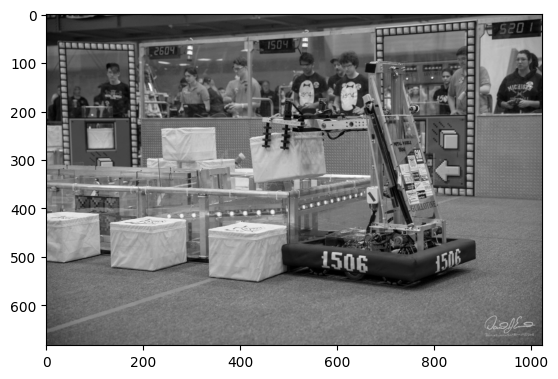

In [21]:
%matplotlib inline
import cv2 # OpenCV is called cv2 for historical reasons
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('powerup.jpg')
# channels = cv2.hconcat(
#     (
#         img[:,:,0],
#         img[:,:,1],
#         img[:,:,2]
#     )
# )
# plt.imshow(channels, cmap='gray')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale
plt.imshow(img, cmap='gray')

By the way, OpenCV images are represented by numpy arrays, which is why we spent time looking at numpy arrays earlier

In [22]:
print(type(img))

<class 'numpy.ndarray'>


Let's look at `cv2.threshold`. Refer to https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html for more info.

In [23]:
help(cv2.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a

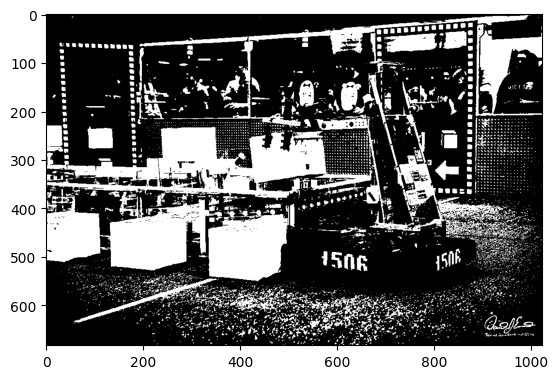

In [26]:
# Typically images are 8 bits per pixel, meaning the maximum value is 2**8 - 1.
ret, out = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
plt.imshow(out, cmap='gray')

For other python specific tutorials see:
https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

In the cell above, `out` is a 2D numpy array where each number represents the brightness of one pixel. In our thresholded image, all the pixels should be 0 or 255.

In [5]:
print(np.max(out), np.min(out))

# Numpy arrays can get very large so when printing them the output is trimmed down to be readable.
print(out)

255 0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In this format we can manipulate the image using the slicing techniques we used in the prior notebook. For instance, we could invert and plot a region in the middle of the image

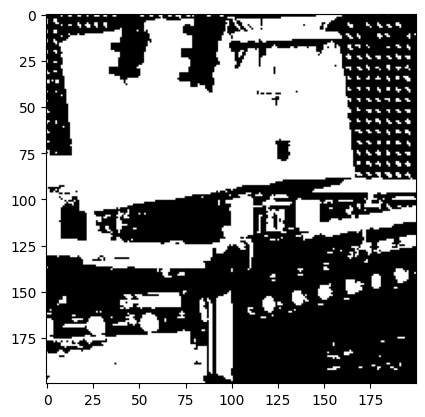

In [6]:
# `//` is a special type of division: normally division can produce a fraction (3 / 2 = 1.5)
# but the double slash truncates the fractional part (3 // 2 = 1)
mid = np.array(out.shape) // 2

# Slice a 200 x 200 box around the midpoint of the image
middle_box = out[mid[0] - 100 : mid[0] + 100, mid[1] - 100 : mid[1] + 100]

plt.imshow(middle_box, cmap = 'gray')

---

# Problem 1
Using an image of your choice...
1. Load the image as grayscale like above and determine the average pixel value of the image.
    1a. What problems might arise when computing the mean of a large image? Think about how computers perform arithmetic.
2. Threshold the image such that all values below average found in (1) are black, and all above the average are white.
3. Calculate the percentage of pixels in the image that are greater than the average.
4. Segment the image into 4 equally sized quadrants and print which quandrant has the greatest percentage of above-threshold pixels
5. Plot a graph that shows the percentage of white pixels as a function of threshold value. Keep in mind that 8 bit gray images have pixel values between 0 and 255, so you should test every threshold in this range.
6. How is the plot created in 5 related to the histogram of the image?
    
Try to design your solution so that later steps build on top of the earlier ones.

Parts of the above can be solved with a `for loop`, OR in one statement by the "right" numpy function or operation. Either is ok for now, but generally the numpy specific tool is _significantly_ faster than a `for` loop.

While testing your program, you should verify your results against a smaller "image" you can create manually.
For instance, if you make something like this...

In [7]:
print(np.array(([0, 0],
                [5, 5])))

[[0 0]
 [5 5]]


Then you can calculate the average and white/black pixels by hand.

In [8]:
# Here's the `for` loop syntax, if you're not familiar:
arr = np.arange(9).reshape((3,3)) # [0, 1, 2, 3, ... 8]
for row in range(arr.shape[0]):
    for col in range(arr.shape[1]):
        print(arr[row, col])

0
1
2
3
4
5
6
7
8
